<a href="https://colab.research.google.com/github/HoonC-corgi/Machine_Learning_SelfStudy/blob/main/Feature_Engineering%2C_Regularization_(Ridge%2C_Lasso).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')    # 데이터 프레임 구조 생성
perch_full = df.to_numpy()  # 넘파이 배열화
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
# 훈련을 해야 변환이 가능함. 사이킷런의 api 때문, fit_transform()을 통해 한 번에 가능
poly = PolynomialFeatures()
poly.fit([[2,3]])                 # fit() 메소드는 특성 조합을 찾음
print(poly.transform([[2,3]]))    # transform() 메소드는 특성 조합을 실제 데이터로 변환함
# PolynomialFeatures는 각 특성의 제곱과 곱, 1이 선형 방정식의 절편으로 인해 디폴트값으로 추가함

[[1. 2. 3. 4. 6. 9.]]


In [12]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]])
# 사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시하기에 명시적으로 사용할 뿐 필수는 아님

array([[2., 3., 4., 6., 9.]])

In [13]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
# 42개의 데이터에 9개의 특성으로 분류 됐음을 확인 가능

(42, 9)


In [14]:
# get_feature_names_out()메소드는 생성된 각 특성의 입력 조합을 알려줌
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [19]:
test_poly = poly.transform(test_input)

# 다중 회귀 모델 훈련


In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [20]:
print(lr.score(test_poly, test_target))

0.9714559911594134


In [21]:
# degree 매개변수를 사용하여 필요한 고차항의 최대 차수 지정 가능
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [22]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [23]:
print(lr.score(test_poly, test_target))
# 특성의 개수를 늘리면 선형 모델은 강력해지나 훈련세트에 과대적합되어 테스트 점수가 낮아짐

-144.40579242684848


# 규제
#### 과도한 훈련 세트 학습을 방지하여 과대적합을 방지

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
# 반드시 훈련세트로 학습한 변환기를 사용해 테스트 세트까지 변환해야 함

# 릿지 회귀

In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
# 릿지, 라쏘 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절할 수도 있음
# 이처럼 머신러닝 모델이 학습할 수 없고 사람이 직접 알려줘야 하는 파라미터를 '하이퍼파라미더'라고 함.

0.9896101671037343


In [27]:
print(ridge.score(test_scaled, test_target))

0.9790693977615391


## 가장 적절한 alpha값 찾기

In [28]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [29]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

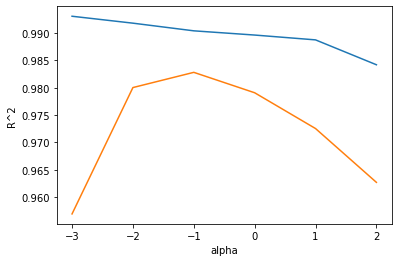

In [30]:
# alpha 값을 0.001 부터 10배씩 늘렸기에 그래프 왼쪽이 촘촘해지므로 동일 간격으로 나타내기 위해 로그함수로 바꾸어 지수로 표현
# 0.001은 -3, 0.01은 -2~
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# alpha값이 -1, 즉 0.1의 alpha 값이 가장 적합

In [31]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


# 라쏘 회귀

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [36]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [37]:
# 라쏘 모델에서의 최적 alpha 값 찾기
train_score = []
test_score = []
lpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))
  #라쏘 모델을 훈련할 때 ConvergenceWearning 경고가 뜰 수 있음, 이는 라쏘 모델이 최적의 계수를 찾기 위해 계산을 반복 수행할 때 지정 반복 횟수가 부족할 때 발생. 이를 max_iter를 통해 지정

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


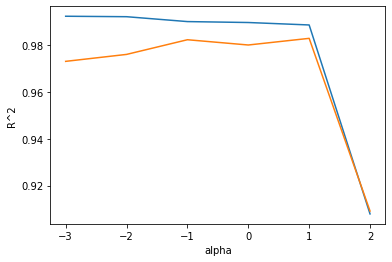

In [38]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# alpha 값이 1, 즉 10일 때 최적임

In [40]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [42]:
# 라쏘 모델은 계수를 0으로 만들 수도 있음
print(np.sum(lasso.coef_ == 0))
# coef에 저장된 0을 계수로 가지는 항이 40개임을 확인할 수 있음, 즉 55개의 특성중 15개만 사용되었음. 따라서 라쏘 모델을 통해 유의미한 특성을 찾을 수 있음

40


# 전체 소스 코드

# 특성 공학과 규제

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 사이킷런의 변환기

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [ ]:
print(train_poly.shape)

(42, 9)


In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [ ]:
print(lr.score(test_poly, test_target))

0.9714559911594122


In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [ ]:
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.999999999999815


In [ ]:
print(lr.score(test_poly, test_target))

-144.40613927413557


## 규제

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9790693977615379


In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

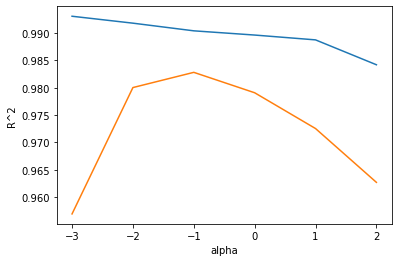

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386983


## 라쏘

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


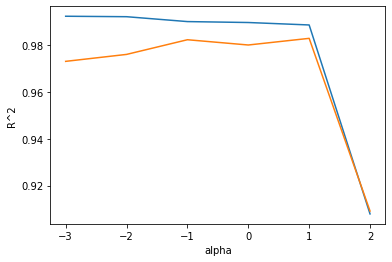

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ == 0))

40


# 총 정리
  ## 키워드
     다중회귀
        여러 특성을 사용하는 회귀 모델, 특성이 많을 수록 강력한 성능을 나타냄

     특성공학
        주어진 특성을 조합하여 새로운 특성을 만드는 작업

     릿지
        규제가 있는 선형 회귀 모델, 선형 모델의 계수를 작게 만들어 과대적합을 완화
      
     라쏘
        규제가 있는 선형 회귀 모델, 릿지와 달리 계수 값을 0으로 만들 수 있음, 따라서 유용한 특성을 구분할 수 있음

     하이퍼파라미터
        머신러닝 알고리즘이 학습하지 않는 파라미터, 사전에 지정해야 함, 릿지와 라쏘의 규제 강도인 alpha 등이 있음


  ## 팁
      릿지와 라쏘의 경우 다항식의 계수, 최적의 alpha 값을 찾은 후 그에 맞게 훈련시키는 것이 좋음
      
      릿지
        train_score = []
        test_score = []

        alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
        for alpha in alpha_list:
          # 릿지 모델을 만듭니다
          ridge = Ridge(alpha=alpha)
          # 릿지 모델을 훈련합니다
          ridge.fit(train_scaled, train_target)
          # 훈련 점수와 테스트 점수를 저장합니다
          train_score.append(ridge.score(train_scaled, train_target))
          test_score.append(ridge.score(test_scaled, test_target))

        plt.plot(np.log10(alpha_list), train_score)
        plt.plot(np.log10(alpha_list), test_score)
        plt.xlabel('alpha')
        plt.ylabel('R^2')
        plt.show()

        ridge = Ridge(alpha=0.1)
        ridge.fit(train_scaled, train_target)




      라쏘
        train_score = []
        test_score = []

        alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
        for alpha in alpha_list:
          # 라쏘 모델을 만듭니다
          lasso = Lasso(alpha=alpha, max_iter=10000)
          # 라쏘 모델을 훈련합니다
          lasso.fit(train_scaled, train_target)
          # 훈련 점수와 테스트 점수를 저장합니다
          train_score.append(lasso.score(train_scaled, train_target))
          test_score.append(lasso.score(test_scaled, test_target))

        plt.plot(np.log10(alpha_list), train_score)
        plt.plot(np.log10(alpha_list), test_score)
        plt.xlabel('alpha')
        plt.ylabel('R^2')
        plt.show()

        lasso = Lasso(alpha=10)
        lasso.fit(train_scaled, train_target)